# Mount Gdrive-Access Files

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.

# PyDrive simplifies many common Google Drive API tasks.
!pip install -U -q PyDrive
# -q means quiet

# provide the ability to authenticate to Google APIs using various methods.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Be able to work within google folder
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Set Home Folder

In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Final_project")
!ls 

 awards.pkl	    model.py		   topic_tpot_folder
 combined_df.pkl    new_tpot_folder	   tpot_folder
'Mod5 Ideas.gdoc'   Oscars.csv		   wiki_movie_plots_deduped.csv
 model_adrw.pkl     rotten_all_movie.csv
 modeling.pkl	    semifinal_df.pkl


In [0]:
import time


In [0]:
!pip3 install fuzzywuzzy[speedup] -q

# Import Libraires for EDA

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 50)

In [0]:
oscars_df = pd.read_csv('Oscars.csv')
rotten_df = pd.read_csv('rotten_all_movie.csv')
plots_df = pd.read_csv('wiki_movie_plots_deduped.csv')

In [0]:
# Fixing Names of Movies that will create errors later...
oscars_df.loc[oscars_df['Name'] == 'Grand Illusion ', 'Name'] = 'La Grande Illusion'
oscars_df.loc[oscars_df['Film'] == 'Grand Illusion', 'Film'] = 'La Grande Illusion'

oscars_df.loc[(oscars_df['Name'] == 'The Invaders '), 'Name'] = '49th Parallel'
oscars_df.loc[(oscars_df['Film'] == 'The Invaders'), 'Name'] = '49th Parallel'

oscars_df.loc[(oscars_df['Name'] == 'MA*S*H '), 'Name'] = 'MASH'
oscars_df.loc[(oscars_df['Film'] == 'MA*S*H'), 'Name'] = 'MASH'


oscars_df.loc[(((oscars_df['Name'] == 'Henry V ') | 
                (oscars_df['Film'] == 'Henry V ')) & (oscars_df['Ceremony'] == 19)), 'Year'] = '1944'

oscars_df.loc[(oscars_df['Name'] == 'Sunset Blvd. '), 'Name'] = 'Sunset Boulevard' 
oscars_df.loc[(oscars_df['Film'] == 'Sunset Blvd.'), 'Film'] = 'Sunset Boulevard'

oscars_df.loc[(oscars_df['Name'] == "Meredith Willson's The Music Man "), 'Name'] = 'The Music Man'
oscars_df.loc[(oscars_df['Film'] == "Meredith Willson's The Music Man"), 'Film'] = 'The Music Man'

oscars_df.loc[(oscars_df['Name'] == "The Russians Are Coming The Russians Are Coming "), 'Name'] = 'The Russians Are Coming! The Russians Are Coming!' 
oscars_df.loc[(oscars_df['Film'] == "The Russians Are Coming The Russians Are Coming"), 'Film'] = 'The Russians Are Coming! The Russians Are Coming!'
# 
oscars_df.loc[(oscars_df['Name'] == "Cries and Whispers "), 'Name'] = 'Cries & Whispers'
oscars_df.loc[(oscars_df['Film'] == "Cries and Whispers"), 'Film'] = 'Cries & Whispers'
# 
oscars_df.loc[(oscars_df['Name'] == "Good Fellas "), 'Name'] = 'Goodfellas' 
oscars_df.loc[(oscars_df['Film'] == "Good Fellas"), 'Film'] = 'Goodfellas'
# 
oscars_df.loc[(oscars_df['Name'] == "The Postman (Il Postino) "), 'Name'] = "Il Postino: The Postman" 
oscars_df.loc[(oscars_df['Film'] == "The Postman (Il Postino)") , 'Film'] = "Il Postino: The Postman"
# 
oscars_df.loc[(oscars_df['Name'] == "Precious: Based on the Novel 'Push' by Sapphire "), 'Name'] = "Precious"
oscars_df.loc[(oscars_df['Film'] == "Precious: Based on the Novel 'Push' by Sapphire"), 'Film'] = "Precious"
# 
oscars_df.loc[(oscars_df['Name'] == "Atlantic City "), 'Year'] = '1980'
oscars_df.loc[(oscars_df['Film'] == "Atlantic City"), 'Year'] = '1980'
# 
oscars_df.loc[(oscars_df['Name'] == "The Champ "), 'Year'] = '1931'
oscars_df.loc[(oscars_df['Film'] == "The Champ"), 'Year'] = '1931'
# 
oscars_df.loc[(oscars_df['Name'] == "The Champ ") , 'Year'] = '1931'
oscars_df.loc[(oscars_df['Film'] == "The Champ") , 'Year'] = '1931'
#
oscars_df.loc[oscars_df['Name'] == 'Cries and Whispers ', 'Year'] = '1972'
oscars_df.loc[oscars_df['Film'] == 'Cries and Whispers', 'Year'] = '1972'

oscars_df.loc[oscars_df['Name'] == 'Picnic ', 'Year'] = '1956'
oscars_df.loc[oscars_df['Film'] == 'Picnic', 'Year'] = '1956'

In [0]:
# 
oscars_df.loc[(oscars_df['Name'] == "The Champ ") , 'Year'] = '1931'
oscars_df.loc[(oscars_df['Film'] == "The Champ") , 'Year'] = '1931'


In [0]:
oscars_df.iloc[140]

Year                     1930/1931
Ceremony                         4
Award       Outstanding Production
Winner                           1
Name                     Cimarron 
Film                     RKO Radio
Name: 140, dtype: object

In [0]:
oscars_df.iloc[735]

Year                                       1938
Ceremony                                     11
Award                    Outstanding Production
Winner                                      NaN
Name                         La Grande Illusion
Film        Realization D'Art Cinematographique
Name: 735, dtype: object

# tmdb tbdecided

In [0]:
!pip install tmdbsimple

In [0]:
import tmdbsimple as tmdb
tmdb.API_KEY = '93acc00f9c5b4399303d5538a5d4c040'

In [0]:
def searching(film_name):
  search = tmdb.Search()
  response = search.movie(query=film_name)
  return search


In [0]:
def get_info(name_df):
  film_list = []
  for film in name_df.Name:
    film = text_cleaner(film)
    search = searching(film)
#     print(film)
    film_info = search.results[0]
#     print(film_info['title'])
    film_list.append((film_info['title'], film_info['release_date']))
    time.sleep(.5)
  return film_list

In [0]:
listy = get_info(winners)
len(listy)

NameError: ignored

In [0]:
oscars_names = winners.Name.tolist()

In [0]:
searched_names = [x[0] for x in listy]

NameError: ignored

In [0]:
for x,y in zip(oscars_names, searched_names):
 
    print(x,'-> is not ->',y)
  

NameError: ignored

# Cleaning Titles for Search

In [0]:
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
from nltk.stem.snowball import SnowballStemmer

In [0]:
nltk.download('stopwords')
pattern = "([a-zA-Z\d]+(?:'[a-z\d]+)?)"
stopwords.words("english")
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def remove_text_inside_brackets(text, brackets="()[]"):
    if type(text) == str:
      count = [0] * (len(brackets) // 2) # count open/close brackets
      saved_chars = []
      for character in text:
          for i, b in enumerate(brackets):
              if character == b: # found bracket
                  kind, is_close = divmod(i, 2)
                  count[kind] += (-1)**is_close # `+1`: open, `-1`: close
                  if count[kind] < 0: # unbalanced bracket
                      count[kind] = 0  # keep it
                  else:  # found bracket to remove
                      break
          else: # character is not a [balanced] bracket
              if not any(count): # outside brackets
                  saved_chars.append(character)
      return ''.join(saved_chars).strip()
    else:
      return text

In [0]:
def text_cleaner(description, stop_stem=False):
    '''uses regex to tokenize words and capture them from the description, 
    lowers the capitilization remove stop words, reduce to stem words, 
    and joins them all in a string'''
    description = description.translate(str.maketrans('','',string.punctuation))
    tokens_raw = nltk.regexp_tokenize(description, pattern)    
    tokens = [i.lower() for i in tokens_raw]
    if stop_stem:
      tokens_stopped = [w for w in tokens if not w in stop_words]
      stemmed = [stemmer.stem(word) for word in tokens_stopped]
      tokens = stemmed
    cleaned = ' '.join(tokens)
    return cleaned

In [0]:
def clean_frame(frame, to_clean):
  for col in to_clean:
    v = [x.strip() for x in frame[col].astype('str')]
    frame[col] = v
  return frame

In [0]:
def make_int(frame, to_clean):
  for col in to_clean:
    items = list()
    for x in frame[col]:
      if '.' in x:
        items.append(float(x))
      else:
        items.append(int(x.replace(',', '')))
#     v = [int(x) for x in frame[col].astype('int32')]
#     frame[col] = v
    frame[col] = items
  return frame

In [0]:
# Best Film Categories: 
bst_film_names = ['Outstanding Picture', 'Outstanding Production','Outstanding Motion Picture', 'Best Motion Picture','Best Picture', 'Best Film']
dates = ['1927/1928','1928/1929', '1929/1930','1930/1931','1931/1932', '1932/1933']
new_dates = [x[-4:] for x in dates]

In [0]:
# ['overview', 'genre_ids']
oscars_df['Award'].replace(bst_film_names, ['Best Picture']*6, inplace=True)
oscars_df['Year'].replace(dates, new_dates, inplace=True)



In [0]:
oscars_df = clean_frame(oscars_df, ['Year', 'Ceremony', 'Award', 'Name', 'Film'])
oscars_df = make_int(oscars_df, ['Year', 'Ceremony'])
oscars_df['Winner'].fillna(0, inplace=True)

In [0]:
oscars_df.tail()

,Year,Ceremony,Award,Winner,Name,Film
9959,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9960,2015,88,Writing (Original Screenplay),0.0,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9961,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,nan
9962,2015,88,Honorary Award,1.0,Spike Lee,nan
9963,2015,88,Honorary Award,1.0,Gena Rowlands,nan


In [0]:
oscars_df[(oscars_df['Year'] == 1939) & (oscars_df['Award'] == 'Best Picture')]

,Year,Ceremony,Award,Winner,Name,Film
873,1939,12,Best Picture,0.0,Dark Victory,Warner Brothers-First National
874,1939,12,Best Picture,1.0,Gone with the Wind,Selznick International Pictures
875,1939,12,Best Picture,0.0,"Goodbye, Mr. Chips",Metro-Goldwyn-Mayer
876,1939,12,Best Picture,0.0,Love Affair,RKO Radio
877,1939,12,Best Picture,0.0,Mr. Smith Goes to Washington,Columbia
878,1939,12,Best Picture,0.0,Ninotchka,Metro-Goldwyn-Mayer
879,1939,12,Best Picture,0.0,Of Mice and Men,Hal Roach (production company)
880,1939,12,Best Picture,0.0,Stagecoach,Walter Wanger (production company)
881,1939,12,Best Picture,0.0,The Wizard of Oz,Metro-Goldwyn-Mayer
882,1939,12,Best Picture,0.0,Wuthering Heights,Samuel Goldwyn Productions


In [0]:
oscars_df.iloc[874]

Year                                   1939
Ceremony                                 12
Award                          Best Picture
Winner                                    1
Name                     Gone with the Wind
Film        Selznick International Pictures
Name: 874, dtype: object

In [0]:
oscars_df.isna().sum()

Year        0
Ceremony    0
Award       0
Winner      0
Name        0
Film        0
dtype: int64

In [0]:
oscars_df.iloc[1200]

Year                1941
Ceremony              14
Award       Best Picture
Winner                 0
Name        Citizen Kane
Film             Mercury
Name: 1200, dtype: object

In [0]:
best_pictures_all = oscars_df[(oscars_df['Award'] == 'Best Picture') & (oscars_df['Year'] > 1930)]

In [0]:
best_pictures_all.columns = ['Year','Ceremony' ,'Award','Winner' ,'Film', 'Production']

In [0]:
best_pictures_all.describe()

,Year,Ceremony,Winner
count,515.000000,515.000000,515.00000
mean,1970.819417,43.825243,0.16699
std,26.987683,26.982927,0.37333
min,1931.000000,4.000000,0.00000
25%,1944.000000,17.000000,0.00000
50%,1970.000000,43.000000,0.00000
75%,1995.000000,68.000000,0.00000
max,2015.000000,88.000000,1.00000


# WebScraping for extra data

In [0]:
import requests
from bs4 import BeautifulSoup
import re
import time

In [0]:
def webpage_html(url):
    r = requests.get(url)
    json = r.json()
    return json

In [0]:
base_url = 'http://www.omdbapi.com/'

# new_api => 82fa3771
# mine not paid
# api = '&apikey=32ed365f'
# robs...
api = '&apikey=82fa3771'

In [0]:
result = webpage_html(base_url +'?t=Cries+&+Whispers&y=1972&plot=full' +api)

In [0]:
result

In [0]:
result['Title']

In [0]:
def clean_name(name, punc=False):
  if punc == True:
    name = text_cleaner(name)
  if '&' in name:
    name = name.replace('&', '%26')
  listy = name.split()
  film = '+'.join(listy)
  return film
  

In [0]:
# need to test -1 to year when doing it.
clean_name('Secrets & Lies')

In [0]:
def get_data(frame):
  data = []
  x = 0
  for film, year in zip(frame.Film, frame.Year):
    
    film = clean_name(film)
    url = base_url + f'?t={film}&y={year}&plot=full'+ api
    json = webpage_html(url)
    if json['Response'] == 'False':
      url = base_url + f'?t={film}&y={year - 1}&plot=full'+ api
      json = webpage_html(url)
      print(film)
      print(x)
    if json['Response'] == 'False':
      url = base_url + f'?t={film}&y={year + 1}&plot=full'+ api
      json = webpage_html(url)
      print(film)
      print(x)
    elif json['Response'] == 'False':
      film = clean_name(film, True)
      print(film)
      print(x)
      url = base_url + f'?t={film}&plot=full'+ api
      json = webpage_html(url)
    
        
    items =['Title', 'Awards', 
            'Runtime', 'Genre', 'Director', 'Writer', 
            'Actors', 'Plot', 'Language', 'Country', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Released']
    new_item = dict()
    for item in items:
      new_item[item] = json[item]
    data.append(new_item)
    x += 1
  return data
    

In [0]:
result.keys()

In [0]:
text_cleaner('42nd sTreet')

# Run get_data to get info from online

In [0]:
trial = get_data(best_pictures_all)

In [0]:
trial[-50]

{'Actors': 'Julianne Moore, Annette Bening, Mark Ruffalo, Mia Wasikowska',
 'Awards': 'Nominated for 4 Oscars. Another 28 wins & 120 nominations.',
 'Country': 'USA',
 'Director': 'Lisa Cholodenko',
 'Genre': 'Comedy, Drama, Romance',
 'Language': 'English',
 'Metascore': '86',
 'Plot': 'Nic and Jules are in a long term, committed, loving but by no means perfect same-sex relationship. Nic, a physician, needs to wield what she believes is control, whereas Jules, under that control, is less self-assured. During their relationship, Jules has floundered in her "nine to five" life, sometimes trying to start a business - always unsuccessfully - or being the stay-at-home mom. She is currently trying to start a landscape design business. They have two teen-aged children, Joni (conceived by Nic) and Laser (by Jules). Although not exact replicas, each offspring does more closely resemble his/her biological mother in temperament. Joni and Laser are also half-siblings, having the same unknown sper

In [0]:
movie_info = pd.DataFrame(trial)
best_pictures_all = best_pictures_all.reset_index()
combined_df = pd.concat([movie_info ,best_pictures_all], axis=1)

In [0]:
combined_df.dtypes

Actors         object
Awards         object
Country        object
Director       object
Genre          object
Language       object
Metascore      object
Plot           object
Ratings        object
Released       object
Runtime        object
Title          object
Writer         object
imdbRating     object
imdbVotes      object
index           int64
Year            int64
Ceremony        int64
Award          object
Winner        float64
Film           object
Production     object
dtype: object

In [0]:
# combined_df.loc[combined_df['Year'] == "1981–", 'Year'] = 1980
# combined_df.loc[7, 'Runtime'] #= '86 min'

In [0]:
combined_df = make_int(combined_df, ['imdbRating', 'imdbVotes'])
y = combined_df[['Runtime']].applymap(lambda x: int(x[:-4]))
combined_df['Runtime'] = y

In [0]:
combined_df = None

# Start with this DataFrame

In [0]:
# pd.to_pickle(combined_df,'combined_df.pkl')
combined_df = pd.read_pickle('combined_df.pkl')

In [0]:
# combined_df['Released'][50]
combined_df['Released'] = combined_df[['Released']].applymap(lambda x: x[3:-5])
combined_df.loc[combined_df.Released == '', 'Released'] = ['Nov', 'Jan', 'Dec']# 11, 1, 12
combined_df['Released'] = combined_df['Released'].astype('category')

In [0]:
columns = ['Year',
           'index',
           'Award',
           'Ceremony',
           'Actors',
           'Awards',
           'Country',
           'Director',
           'Genre',
           'Language',
           'Plot',
           'Released',
           'Runtime',
           'Title',
           'Writer',
           'Film',
           'Production',
           'Ratings',
           'Metascore',  'imdbRating', 'imdbVotes', 'Winner']


In [0]:
len(columns)

22

In [0]:
def get_list(frame, value):
  temp = frame[value].str.split(',')
  values = []
  for item in temp:
    values_dict = dict()
    for idx, val in enumerate(item):
      values_dict[value+str(idx)] = val
    values.append(values_dict)
  return values

In [0]:
actors_df = pd.DataFrame(get_list(combined_df, 'Actors'))
genres_df = pd.DataFrame(get_list(combined_df, 'Genre'))
writer_df = pd.DataFrame(get_list(combined_df, 'Writer'))
director_df = pd.DataFrame(get_list(combined_df, 'Director'))

In [0]:
semifinal_df = pd.concat([combined_df, actors_df, genres_df, writer_df, director_df], axis=1 )

In [0]:
combined_cols = ['Actors', 'Awards', 'Country', 'Director', 'Genre', 'Language', 'Plot',
       'Runtime', 'Title', 'Writer', 'Year', 'index', 'Year1', 'Ceremony',
       'Award', 'Winner', 'Film', 'Production']

In [0]:
actors_cols = ['Actors0', 'Actors1', 'Actors2', 'Actors3']

In [0]:
genres_cols = ['Genre0', 'Genre1'] #, 'Genre2']
# Genres 3-5 Were taken out because odds werent in their favor
# , 'Genre3', 'Genre4', 'Genre5']

In [0]:
director_cols = ['Director0'] #, 'Director1']
# Director 1 was lucky on the first round and directors 2-4 irrelevant
# , 'Director2', 'Director3', 'Director4']

In [0]:
writer_cols = ['Writer0', 'Writer1'] #,'Writer2']
# Writers 3-10 were taken out for reasons...
#  'Writer3','Writer4', 'Writer5', 'Writer6', 'Writer7', 'Writer8', 'Writer9', 'Writer10']

In [0]:
semifinal_df = semifinal_df[columns + actors_cols + director_cols + genres_cols + writer_cols]
semifinal_df[writer_cols] = semifinal_df[writer_cols].applymap(remove_text_inside_brackets)


In [0]:
semifinal_df.columns

Index(['Year', 'index', 'Award', 'Ceremony', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Plot', 'Released', 'Runtime', 'Title',
       'Writer', 'Film', 'Production', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'Winner', 'Actors0', 'Actors1', 'Actors2', 'Actors3',
       'Director0', 'Genre0', 'Genre1', 'Writer0', 'Writer1'],
      dtype='object')

In [0]:
# pd.to_pickle(semifinal_df, 'semifinal_df.pkl')
semifinal_df = pd.read_pickle('semifinal_df.pkl')

In [0]:
target = ['Winner']

In [0]:
final_col = ['Actors0', 'Actors1',
       'Actors2', 'Actors3', 'Director0', 'Director1', 'Genre0', 'Writer0', 'Writer1', 'Writer2']
plot = ['Plot']
title = ['Title']

In [10]:
actors_df = oscars_df[oscars_df['Award'] == 'Actor']


NameError: ignored

In [0]:
actors_df.head()

In [0]:
awards_df = oscars_df.applymap(remove_text_inside_brackets)

In [11]:
acting_awards = awards_df[awards_df.Award.isin( ['Actor' ,'Actress',
         'Actor in a Supporting Role' , 'Actress in a Supporting Role', 
         'Actor in a Leading Role', 'Actress in a Leading Role' ])]


NameError: ignored

In [0]:
# Film Contains writers name
writers_directors_award = awards_df[awards_df.Award.isin(['Writing', 'Directing']) & (awards_df.Year > 1930) ]

In [0]:
writers_directors_award.columns = ['Year', 'Ceremony', 'Award', 'Winner', 'Film', 'Name']

In [0]:
actors_df.columns

Index(['Actors0', 'Actors1', 'Actors2', 'Actors3'], dtype='object')

In [0]:
writers_directors_award.columns

Index(['Year', 'Ceremony', 'Award', 'Winner', 'Film', 'Name'], dtype='object')

In [0]:
writers_directors_award = writers_directors_award[actors_df.columns]

In [0]:
awards = pd.concat([acting_awards, writers_directors_award], axis =0)

In [0]:
# pd.to_pickle(awards, 'awards.pkl')
awards = pd.read_pickle('awards.pkl')

In [0]:
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz
# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

In [0]:
def get_ratio(row):
    name = row['Film']
    
    return fuzz.token_sort_ratio(name, 'Alejandro G. Iñarritu')

In [0]:
# Given a dataframe, name and year this will return the correct number of oscars won.
def get_oscars(name, year=2017):
  O = awards[(awards.apply(lambda row: fuzz.token_sort_ratio(row['Name'], name), axis=1) > 80) & (awards.Year < year)].Winner.sum()
  return O

In [0]:
def cycle_(dataframe):
  for i in range(len(dataframe)):
    for item in list(dataframe.columns)[:-1]:
      dataframe.loc[i,item] = get_oscars(dataframe.loc[i, item] , dataframe.loc[i, 'Year'])
  return dataframe

# Actors, Writers, Directors, Genres

In [17]:
semifinal_df.columns

Index(['Year', 'index', 'Award', 'Ceremony', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Plot', 'Released', 'Runtime', 'Title',
       'Writer', 'Film', 'Production', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'Winner', 'Actors0', 'Actors1', 'Actors2', 'Actors3',
       'Director0', 'Genre0', 'Genre1', 'Writer0', 'Writer1'],
      dtype='object')

In [18]:
oscar_peeps_ad = semifinal_df[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Year']]
peeps_w_oscars = cycle_(oscar_peeps_ad)
peeps_w_oscars = peeps_w_oscars[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0']]
                          

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: ignored

In [0]:
semifinal_df.columns

Index(['Year', 'index', 'Award', 'Ceremony', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Plot', 'Released', 'Runtime', 'Title',
       'Writer', 'Film', 'Production', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'Winner', 'Actors0', 'Actors1', 'Actors2', 'Actors3',
       'Director0', 'Genre0', 'Genre1', 'Writer0', 'Writer1'],
      dtype='object')

In [0]:
genre_dummies = pd.get_dummies(semifinal_df[['Genre0']])
genre_dummies.columns = [x[7:] for x in genre_dummies.columns]
released_df = pd.get_dummies(semifinal_df[['Released']])
released_df.columns = [x[9:] for x in released_df.columns]
semifinal_df.drop('Released', inplace=True, axis=1)

In [0]:
semifinal_df.drop(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Genre0', 'Genre1'], inplace=True, axis=1)

In [0]:
modeling_df = pd.concat([peeps_w_oscars , genre_dummies,released_df ,semifinal_df], axis = 1)

In [0]:
modeling_df.columns

Index(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Year', 'index',
       'Award', 'Ceremony', 'Actors', 'Awards', 'Country', 'Director', 'Genre',
       'Language', 'Plot', 'Runtime', 'Title', 'Writer', 'Film', 'Production',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Winner', 'Writer0',
       'Writer1'],
      dtype='object')

In [0]:
# modeling_df.to_pickle('modeling.pkl')

In [0]:
# remember to read pkl file...if I want to use old one
# modeling_df = pd.read_pickle('model_adrw.pkl')


# Test Train kinda

## Get Final Columns

In [0]:
final_frame = pd.read_pickle('modeling.pkl')

In [6]:
final_frame.columns

Index(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Year', 'index',
       'Award', 'Ceremony', 'Actors', 'Awards', 'Country', 'Director', 'Genre',
       'Language', 'Plot', 'Runtime', 'Title', 'Writer', 'Film', 'Production',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Winner', 'Writer0',
       'Writer1'],
      dtype='object')

In [0]:
fcolumns = ['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western','Country', 'Plot',  'Runtime','imdbRating', 'Winner']

In [0]:
modeling_df = final_frame[fcolumns]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = modeling_df.iloc[:,:-1]

In [0]:
X.head(1)

,Actors0,Actors1,Actors2,Actors3,Director0,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Sci-Fi,Short,Western,Country,Plot,Runtime,imdbRating
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,USA,When the government opens up the Oklahoma terr...,123,6.0


In [0]:
y = modeling_df.Winner

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil -q
!pip install psutil -q
!pip install humanize -q
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.8 GB  | Proc size: 465.9 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


# Clean Plot

In [0]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"


In [0]:
def text_cleaner(description):
    ''''''
    tokens_raw = nltk.regexp_tokenize(description, pattern)
    tokens = [i.lower() for i in tokens_raw]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    stemmed = [stemmer.stem(word) for word in tokens_stopped]
    cleaned = ' '.join(stemmed)
    return cleaned

In [0]:
plot_df = X_train['Plot'].apply(text_cleaner)
test_plot = X_test['Plot'].apply(text_cleaner)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
response = tfidf.fit_transform(plot_df)
testing_plot = tfidf.transform(test_plot)

In [0]:
plot_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
test_plot = pd.DataFrame(testing_plot.toarray(), columns=tfidf.get_feature_names())

In [0]:
# plot_df['index'] = X_train.index
plot_df.index = X_train.index
# plot_df.set_index('index', inplace=True)
# test_plot['index'] = X_test.index
test_plot.index = X_test.index
# test_plot.set_index('index', inplace=True)

In [0]:
plot_df.shape

(412, 6048)

## Dimensionality Reduction on PLOT

In [0]:
from sklearn.decomposition import TruncatedSVD, PCA, LatentDirichletAllocation

### PCA

341


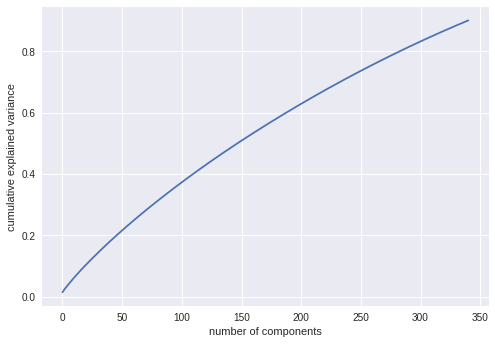

In [0]:
pca = PCA(.9)
pca.fit(pca_df)
print(len(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Truncated SVD

In [0]:
tsvd = TruncatedSVD(1000)

In [0]:
tsvd.fit(plot_df)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

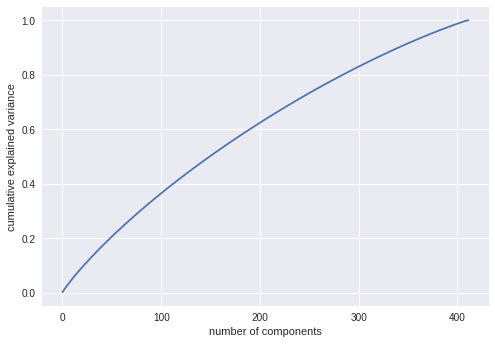

In [0]:
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### LDA - Bad need to do countvector

In [0]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
lda = LatentDirichletAllocation()

In [0]:
lda.fit(plot_df)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [0]:
lda_df = pd.DataFrame(lda.transform(plot_df), columns=lda.n_topics)

In [0]:
lda_df.shape

(412, 10)

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [0]:
display_topics(lda, plot_df.columns, 10)

Topic 0:
war tri eve take henri societi stark conni alic love
Topic 1:
get new two father live work come life marri way
Topic 2:
joe war wife norma georg ranch albert abl meet self
Topic 3:
wallac ring find kill love famili husband johnni caesar blanch
Topic 4:
tom one live stori tri life dr mildr firm brother
Topic 5:
one love michael he mozart lermontov blacki daughter rick benjamin
Topic 6:
love henri becom world one war life ann daughter film
Topic 7:
brother kimbl homer patrick island militari tess larri found ralston
Topic 8:
frank stori show year mother father man find son love
Topic 9:
life father famili jerri first year find young boy jenni


### NMF - works with TF-IDF

In [0]:
from sklearn.decomposition import NMF

In [0]:
no_topics, no_top_words = 15, 10

In [0]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(plot_df)

In [0]:
display_topics(nmf, plot_df.columns, no_top_words)

Topic 0:
life love one find live father famili year new stori
Topic 1:
billi basebal ear statist oakland salari data handicap gm bean
Topic 2:
lt war henri analys barkley ambul catherin purpos driver love
Topic 3:
lock oskar lot father lash scaveng bound cope hunt aliv
Topic 4:
celi pregnant tough life black next stay earli grow girl
Topic 5:
frank thanksgiv natali look reckon home forward school col blind
Topic 6:
town small benson hal homer alan deed fbi younger agent
Topic 7:
henri king ann queen princ boleyn viii son christma indecis
Topic 8:
capulet montagu juliet romeo verona famili tragedi parti marri daughter
Topic 9:
georg ranch potter lenni alic eastman angela martha own ann
Topic 10:
ring evil frodo destroy hobbit quest sam aragorn sauron fellowship
Topic 11:
caesar antoni cleopatra rome egypt cassius brutus barg conspir roman
Topic 12:
jerri luci joke mulligan lise influenti acerb abound best heiress
Topic 13:
romanian mexico engin count german born unit children complic tr

In [0]:
nmf_train_df = pd.DataFrame(nmf.transform(plot_df), columns=range(nmf.n_components))
nmf_test_df = pd.DataFrame(nmf.transform(test_plot), columns=range(nmf.n_components))

In [0]:
nmf_train_df.index = X_train.index
nmf_test_df.index = X_test.index

## Join plot with Other

In [0]:
X_train_plot = pd.concat([X_train, nmf_train_df], axis=1)
X_test_plot = pd.concat([X_test, nmf_test_df], axis=1)

In [0]:
X_train_plot.drop(['Plot', 'Country'], inplace=True, axis=1)
X_test_plot.drop(['Plot', 'Country'], inplace=True, axis=1)

# Model Selection?

In [0]:
!pip install TPOT deap update_checker tqdm stopit xgboost dask_ml -q

    100% |████████████████████████████████| 901kB 24.3MB/s 
    100% |████████████████████████████████| 942kB 22.1MB/s 
    100% |████████████████████████████████| 112kB 28.8MB/s 


In [0]:
!pip install dask[delayed] dask-ml -q

In [0]:
from tpot import TPOTClassifier

In [0]:
!ls

 awards.pkl	    model_adrw.pkl   rotten_all_movie.csv
 bestestyet.py	    modeling.pkl     semifinal_df.pkl
 combined_df.pkl    model.py	     tpot_folder
'Mod5 Ideas.gdoc'   Oscars.csv	     wiki_movie_plots_deduped.csv


In [0]:
config_dict = {

    # Classifiers
    'sklearn.naive_bayes.GaussianNB': {
    },

    'sklearn.naive_bayes.BernoulliNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },

    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },

    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ["gini", "entropy"],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },

    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf':  range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.GradientBoostingClassifier': {
        'n_estimators': [100],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'subsample': np.arange(0.05, 1.01, 0.05),
        'max_features': np.arange(0.05, 1.01, 0.05)
    },

    'sklearn.neighbors.KNeighborsClassifier': {
        'n_neighbors': range(1, 101),
        'weights': ["uniform", "distance"],
        'p': [1, 2]
    },

    'sklearn.svm.LinearSVC': {
        'penalty': ["l1", "l2"],
        'loss': ["hinge", "squared_hinge"],
        'dual': [True, False],
        'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
    },

    'sklearn.linear_model.LogisticRegression': {
        'penalty': ["l1", "l2"],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
        'dual': [True, False]
    },

    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },

    # Preprocesssors
    'sklearn.preprocessing.Binarizer': {
        'threshold': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.decomposition.FastICA': {
        'tol': np.arange(0.0, 1.01, 0.05)
    },

#     'sklearn.cluster.FeatureAgglomeration': {
#         'linkage': ['ward', 'complete', 'average'],
#         'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
#     },

#     'sklearn.preprocessing.MaxAbsScaler': {
#     },

#     'sklearn.preprocessing.MinMaxScaler': {
#     },

#     'sklearn.preprocessing.Normalizer': {
#         'norm': ['l1', 'l2', 'max']
#     },

    'sklearn.kernel_approximation.Nystroem': {
        'kernel': ['rbf', 'cosine', 'chi2', 'laplacian', 'polynomial', 'poly', 'linear', 'additive_chi2', 'sigmoid'],
        'gamma': np.arange(0.0, 1.01, 0.05),
        'n_components': range(1, 11)
    },

    'sklearn.decomposition.PCA': {
        'svd_solver': ['randomized'],
        'iterated_power': range(1, 11)
    },

    'sklearn.preprocessing.PolynomialFeatures': {
        'degree': [2],
        'include_bias': [False],
        'interaction_only': [False]
    },

    'sklearn.kernel_approximation.RBFSampler': {
        'gamma': np.arange(0.0, 1.01, 0.05)
    },

#     'sklearn.preprocessing.RobustScaler': {
#     },

#     'sklearn.preprocessing.StandardScaler': {
#     },

#     'tpot.builtins.ZeroCount': {
#     },

    'tpot.builtins.OneHotEncoder': {
        'minimum_fraction': [0.05, 0.1, 0.15, 0.2, 0.25],
        'sparse': [False],
        'threshold': [10]
    },

    # Selectors
    'sklearn.feature_selection.SelectFwe': {
        'alpha': np.arange(0, 0.05, 0.001),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.SelectPercentile': {
        'percentile': range(1, 100),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.VarianceThreshold': {
        'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
    },

    'sklearn.feature_selection.RFE': {
        'step': np.arange(0.05, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesClassifier': {
                'n_estimators': [100],
                'criterion': ['gini', 'entropy'],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    },

    'sklearn.feature_selection.SelectFromModel': {
        'threshold': np.arange(0, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesClassifier': {
                'n_estimators': [100],
                'criterion': ['gini', 'entropy'],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    }

}

In [0]:
pipeline_optimizer = TPOTClassifier(generations=50, 
                                    cv = 5 ,
                                    population_size=100,
#                                     max_eval_time_mins=5, 
                                    config_dict=config_dict ,
                                    verbosity=3, 
                                    periodic_checkpoint_folder='topic_tpot_folder')


In [0]:
x=1

In [0]:
np.any(np.isnan(X_train_plot))

False

In [0]:
pipeline_optimizer.fit(X_train, y_train)
pipeline_optimizer.export('model'+str(x)+'.py')

22 operators have been imported by TPOT.


Optimization Progress:   5%|▍         | 5/110 [05:09<2:39:28, 91.13s/pipeline]

Skipped pipeline #5 due to time out. Continuing to the next pipeline.


Optimization Progress:  10%|█         | 11/110 [05:31<33:12, 20.13s/pipeline]

Saving best periodic pipeline to tpot_folder/pipeline_2019.02.04_21-03-53.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _mate_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  19%|█▉        | 21/110 [06:17<09:24,  6.34s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.8349673202614379	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.01, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=10, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.05)

Periodic pipeline was not saved, probably saved before...
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 59


Optimization Progress:  21%|██        | 23/110 [06:18<06:36,  4.56s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  25%|██▍       | 27/110 [06:38<07:37,  5.52s/pipeline]

NameError: ignored

# Testing?

## Graphing functions

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## First Model

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.55, min_samples_leaf=2, min_samples_split=7, n_estimators=100)

exported_pipeline.fit(X_train, y_train)


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.55, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
results = exported_pipeline.predict(X_test)

In [0]:
exported_pipeline.score(X_test, y_test)

0.8252427184466019

In [0]:
y_hat = exported_pipeline.predict(X_test)

In [0]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        85
         1.0       0.00      0.00      0.00        18

   micro avg       0.83      0.83      0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[85  0]
 [18  0]]


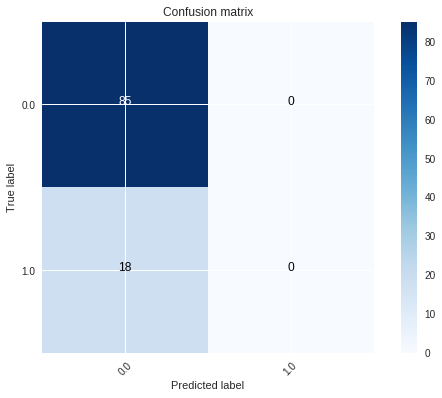

In [0]:
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, [0.0, 1.0])

Model gives ~83% accuraccy due to class imbalance. It classifies every movie as not winning an oscar. No prediction was correct. Running new models to see if something better pops up, otherwise will have to up sample from oscar winning movies to correct class imbalance.

## Second Model

In [0]:
from sklearn.svm import LinearSVC

In [0]:
exported_pipeline = LinearSVC(C=0.1, dual=False, loss="squared_hinge", penalty="l2", tol=0.0001)

exported_pipeline.fit(X_train, y_train)
y_hat = exported_pipeline.predict(X_test)

In [0]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        85
         1.0       0.00      0.00      0.00        18

   micro avg       0.83      0.83      0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[85  0]
 [18  0]]


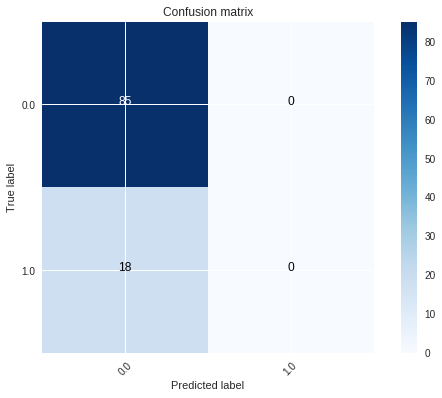

In [0]:
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, [0.0, 1.0])

# Correcting the Class Imbalance

## Using SMOTE

In [0]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  688
Number of no subscription in oversampled data 344
Number of subscription 344
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator


# Average CV score on the training set was:0.9753496058988049
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=BernoulliNB(alpha=0.1, fit_prior=True)),
    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.4, min_samples_leaf=18, min_samples_split=4, n_estimators=100)
)

exported_pipeline.fit(os_data_X, os_data_y.values.ravel())
y_hat = exported_pipeline.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        85
         1.0       0.00      0.00      0.00        18

   micro avg       0.83      0.83      0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103

Confusion matrix, without normalization
[[85  0]
 [18  0]]


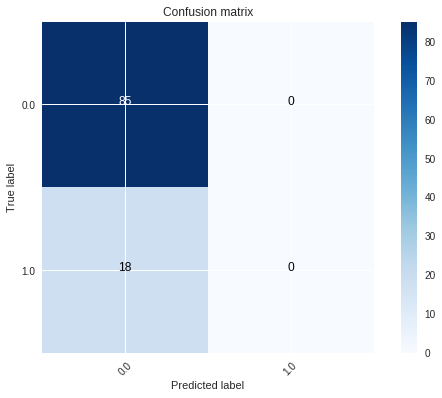

In [0]:
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, [0.0, 1.0])

Using SMOTE to bring the class imbalance to 50/50 in the training data corrected the class imbalance in the overall data set but didnt generalize well to the testing set.

## Combining UP and DOWN sampling

In [0]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio = 'auto',random_state=0)

columns = X_train_plot.columns

smt_data_X, smt_data_y = smt.fit_sample(X_train_plot, y_train)

smt_data_X = pd.DataFrame(data=smt_data_X, columns=columns )
smt_data_y= pd.DataFrame(data=smt_data_y, columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(smt_data_X))
print("Number of no subscription in oversampled data",len(smt_data_y[smt_data_y['y']==0]))
print("Number of subscription",len(smt_data_y[smt_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(smt_data_y[smt_data_y['y']==0])/len(smt_data_X))
print("Proportion of subscription data in oversampled data is ",len(smt_data_y[smt_data_y['y']==1])/len(smt_data_X))

length of oversampled data is  650
Number of no subscription in oversampled data 325
Number of subscription 325
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [0]:
X_train_plot.head(1)

,Actors0,Actors1,Actors2,Actors3,Director0,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Sci-Fi,Short,Western,Runtime,imdbRating,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
320,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,116,7.4,0.077602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
pipeline_optimizer.fit(smt_data_X, smt_data_y.values.ravel())

In [0]:
pipeline_optimizer.export('bestever5100.py')

True

In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator

Best Pipelines:

In [0]:
# Average CV score on the training set was:0.873980632008155
exported_pipeline = make_pipeline(
    Normalizer(norm="max"),
    PCA(iterated_power=4, svd_solver="randomized"),
    GradientBoostingClassifier(learning_rate=0.1, 
                               max_depth=9, 
                               max_features=0.9000000000000001, 
                               min_samples_leaf=5,
                               min_samples_split=16, 
                               n_estimators=100, 
                               subsample=0.9000000000000001, 
                               random_state=198)
)

In [0]:
# Average CV score on the training set was:0.8349673202614379
exported_pipeline = ExtraTreesClassifier(bootstrap=True, 
                                         criterion="gini",
                                         max_features=0.55, 
                                         min_samples_leaf=2, 
                                         min_samples_split=7, 
                                         n_estimators=100)

In [0]:
exported_pipeline.fit(smt_data_X, smt_data_y.values.ravel())

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='max')), ('pca', PCA(copy=True, iterated_power=4, n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              le....9000000000000001, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False))])

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        85
         1.0       0.33      0.33      0.33        18

   micro avg       0.77      0.77      0.77       103
   macro avg       0.60      0.60      0.60       103
weighted avg       0.77      0.77      0.77       103

Confusion matrix, without normalization
[[73 12]
 [12  6]]


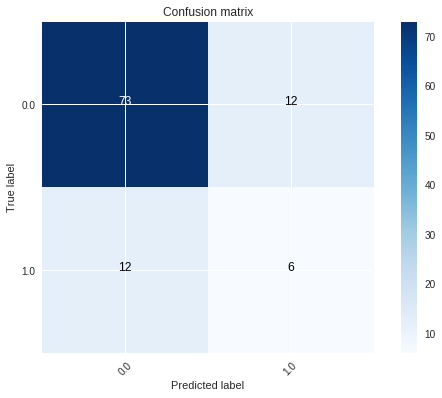

In [0]:
results = exported_pipeline.predict(X_test_plot)
print(classification_report(y_test, results))
cm = confusion_matrix(y_test, results)
plot_confusion_matrix(cm, [0.0, 1.0])

In [0]:
modeling_df.head()

NameError: ignored

# Predicting 2016

## Retrieve Data from Academy Awards

In [0]:
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'BEST PICTURE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    statement = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['statement'] = statement
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

## Format Data

In [0]:
# data of year 2016
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')


In [0]:
# append the data we scrapped to the df_awards
data=[]
for k,v in best_2017.items():
    row = []
    row.append(['2016', 89, 'Best Picture', v['is_winner'], v['film_title'], v['statement']])
    data.append(row[0])


In [0]:
colx = ['Year','Ceremony' ,'Award','Winner' ,'Film', 'Production']

In [0]:
test2016 = pd.DataFrame(data, columns=colx)
test2016

,Year,Ceremony,Award,Winner,Film,Production
0,2016,89,Best Picture,1,Call Me by Your Name,"Peter Spears, Luca Guadagnino, Emilie Georges ..."
1,2016,89,Best Picture,1,Darkest Hour,"Tim Bevan, Eric Fellner, Lisa Bruce, Anthony M..."
2,2016,89,Best Picture,1,Dunkirk,"Emma Thomas and Christopher Nolan, Producers"
3,2016,89,Best Picture,1,Get Out,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr..."
4,2016,89,Best Picture,1,Lady Bird,"Scott Rudin, Eli Bush and Evelyn O'Neill, Prod..."
5,2016,89,Best Picture,1,Phantom Thread,"JoAnne Sellar, Paul Thomas Anderson, Megan Ell..."
6,2016,89,Best Picture,1,The Post,"Amy Pascal, Steven Spielberg and Kristie Macos..."
7,2016,89,Best Picture,1,The Shape of Water,"Guillermo del Toro and J. Miles Dale, Producers"
8,2016,89,Best Picture,1,"Three Billboards outside Ebbing, Missouri","Graham Broadbent, Pete Czernin and Martin McDo..."


In [0]:
test2016.loc[test2016.Film != 'The Shape of Water', 'Winner'] = 0

In [0]:
test2016.head()

,Year,Ceremony,Award,Winner,Film,Production
0,2016,89,Best Picture,0,Call Me by Your Name,"Peter Spears, Luca Guadagnino, Emilie Georges ..."
1,2016,89,Best Picture,0,Darkest Hour,"Tim Bevan, Eric Fellner, Lisa Bruce, Anthony M..."
2,2016,89,Best Picture,0,Dunkirk,"Emma Thomas and Christopher Nolan, Producers"
3,2016,89,Best Picture,0,Get Out,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr..."
4,2016,89,Best Picture,0,Lady Bird,"Scott Rudin, Eli Bush and Evelyn O'Neill, Prod..."


In [0]:
test2016 = make_int(test2016, ['Year'])

In [0]:
test2016extra = get_data(test2016)

Call+Me+by+Your+Name
0
Call+Me+by+Your+Name
0
Dunkirk
2
Dunkirk
2
Lady+Bird
4
Lady+Bird
4
Phantom+Thread
5
Phantom+Thread
5
The+Shape+of+Water
7
The+Shape+of+Water
7
Three+Billboards+outside+Ebbing,+Missouri
8
Three+Billboards+outside+Ebbing,+Missouri
8


In [0]:
mi = pd.DataFrame(test2016extra)
mitest = pd.concat([mi ,test2016], axis=1)

In [0]:
mitest.drop([1,3,6], inplace=True)
mitest.index = range(len(mitest))
mitest

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Ratings,Released,Runtime,Title,Writer,imdbRating,imdbVotes,Year,Ceremony,Award,Winner,Film,Production
0,"Armie Hammer, Timothée Chalamet, Michael Stuhl...",Won 1 Oscar. Another 82 wins & 196 nominations.,"Italy, France, Brazil, USA",Luca Guadagnino,"Drama, Romance","English, Italian, French, German, Hebrew",93,Call Me by Your Name is the story of a sudden ...,"[{'Source': 'Internet Movie Database', 'Value'...",19 Jan 2018,132 min,Call Me by Your Name,"James Ivory (screenplay by), André Aciman (bas...",7.9,"138,287",2016,89,Best Picture,0,Call Me by Your Name,"Peter Spears, Luca Guadagnino, Emilie Georges ..."
1,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...",Won 3 Oscars. Another 51 wins & 197 nominations.,"UK, Netherlands, France, USA",Christopher Nolan,"Action, Drama, History, Thriller, War","English, French, German",94,"Evacuation of Allied soldiers from Belgium, th...","[{'Source': 'Internet Movie Database', 'Value'...",21 Jul 2017,106 min,Dunkirk,Christopher Nolan,7.9,"442,551",2016,89,Best Picture,0,Dunkirk,"Emma Thomas and Christopher Nolan, Producers"
2,"Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lu...",Nominated for 5 Oscars. Another 102 wins & 191...,USA,Greta Gerwig,"Comedy, Drama","English, Spanish",94,"In 2002, an artistically inclined seventeen-ye...","[{'Source': 'Internet Movie Database', 'Value'...",01 Dec 2017,94 min,Lady Bird,Greta Gerwig,7.4,"161,317",2016,89,Best Picture,0,Lady Bird,"Scott Rudin, Eli Bush and Evelyn O'Neill, Prod..."
3,"Vicky Krieps, Daniel Day-Lewis, Lesley Manvill...",Won 1 Oscar. Another 46 wins & 93 nominations.,"USA, UK",Paul Thomas Anderson,"Drama, Romance","English, French",90,"Set in 1950s London, Reynolds Woodcock is a re...","[{'Source': 'Internet Movie Database', 'Value'...",19 Jan 2018,130 min,Phantom Thread,Paul Thomas Anderson,7.5,"79,989",2016,89,Best Picture,0,Phantom Thread,"JoAnne Sellar, Paul Thomas Anderson, Megan Ell..."
4,"Sally Hawkins, Michael Shannon, Richard Jenkin...",Won 4 Oscars. Another 101 wins & 293 nominations.,USA,Guillermo del Toro,"Adventure, Drama, Fantasy, Romance, Thriller","English, American Sign Language, Russian, French",87,At a top secret research facility in the 1960s...,"[{'Source': 'Internet Movie Database', 'Value'...",22 Dec 2017,123 min,The Shape of Water,"Guillermo del Toro (screenplay by), Vanessa Ta...",7.4,"284,504",2016,89,Best Picture,1,The Shape of Water,"Guillermo del Toro and J. Miles Dale, Producers"
5,"Frances McDormand, Caleb Landry Jones, Kerry C...",Won 2 Oscars. Another 104 wins & 193 nominations.,"UK, USA",Martin McDonagh,"Comedy, Crime, Drama",English,88,"THREE BILLBOARDS OUTSIDE EBBING, MISSOURI is a...","[{'Source': 'Internet Movie Database', 'Value'...",01 Dec 2017,115 min,"Three Billboards Outside Ebbing, Missouri",Martin McDonagh,8.2,"313,592",2016,89,Best Picture,0,"Three Billboards outside Ebbing, Missouri","Graham Broadbent, Pete Czernin and Martin McDo..."


In [0]:
mitest = make_int(mitest, ['imdbRating', 'imdbVotes'])
y = mitest[['Runtime']].applymap(lambda x: int(x[:-4]))
mitest['Runtime'] = y

In [0]:
mitest['Released'] = mitest[['Released']].applymap(lambda x: x[3:-5])

In [0]:
mitest['Released'] = mitest['Released'].astype('category')

In [0]:
actors_df = pd.DataFrame(get_list(mitest, 'Actors'))
genres_df = pd.DataFrame(get_list(mitest, 'Genre'))
writer_df = pd.DataFrame(get_list(mitest, 'Writer'))
director_df = pd.DataFrame(get_list(mitest, 'Director'))

In [0]:
mitestsemifinal_df = pd.concat([mitest, actors_df, genres_df, writer_df, director_df], axis=1 )

In [0]:
testcolumns = ['Year',  'Award', 'Ceremony', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Plot', 'Released', 'Runtime', 'Title',
       'Writer', 'Film', 'Production', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'Winner', 'Actors0', 'Actors1', 'Actors2', 'Actors3',
       'Director0', 'Genre0', 'Genre1', 'Writer0', 'Writer1']

In [0]:
semifinal_df = mitestsemifinal_df[testcolumns]
semifinal_df[writer_cols] = semifinal_df[writer_cols].applymap(remove_text_inside_brackets)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [0]:
oscar_peeps_ad = semifinal_df[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Year']]
peeps_w_oscars = cycle_(oscar_peeps_ad)
peeps_w_oscars = peeps_w_oscars[['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
genre_dummies = pd.get_dummies(semifinal_df[['Genre0']])
genre_dummies.columns = [x[7:] for x in genre_dummies.columns]
released_df = pd.get_dummies(semifinal_df[['Released']])
released_df.columns = [x[9:] for x in released_df.columns]
semifinal_df.drop('Released', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
semifinal_df.drop(['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Genre0', 'Genre1'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
modeling_df = pd.concat([peeps_w_oscars , genre_dummies,released_df ,semifinal_df], axis = 1)

In [0]:
modeling_df.shape

(6, 34)

In [0]:
missing_col = ['Biography', 'Adventure' ,'Animation', 'Crime' ,'Family' ,'Fantasy' ,'Film-Noir', 'Horror', 'Music' ,'Musical', 'Mystery' ,'Sci-Fi' ,'Short' ,'Western']

In [0]:
missing_df = pd.DataFrame(np.zeros((9,len(missing_col))),columns=missing_col)

In [0]:
modelingf_df = pd.concat([missing_df, modeling_df], axis=1)

In [0]:
final_columns_from_ = ['Actors0', 'Actors1', 'Actors2', 'Actors3', 'Director0', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Sci-Fi', 'Short', 'Western','Country', 'Plot',  'Runtime','imdbRating', 'Winner']

In [0]:
finaltest = modelingf_df[final_columns_from_]

In [0]:
X_t = finaltest.iloc[:6,:-1]


In [0]:
y_t = finaltest.Winner

In [0]:
X_t.Plot

0    Call Me by Your Name is the story of a sudden ...
1    Evacuation of Allied soldiers from Belgium, th...
2    In 2002, an artistically inclined seventeen-ye...
3    Set in 1950s London, Reynolds Woodcock is a re...
4    At a top secret research facility in the 1960s...
5    THREE BILLBOARDS OUTSIDE EBBING, MISSOURI is a...
Name: Plot, dtype: object

In [0]:
plot_test_df = X_t['Plot'].apply(text_cleaner)
t_plot = tfidf.transform(plot_test_df)
t_plot = pd.DataFrame(t_plot.toarray(), columns=tfidf.get_feature_names())
nmf_t_df = pd.DataFrame(nmf.transform(t_plot), columns=range(nmf.n_components))



In [0]:
X_t_plot = pd.concat([X_t, nmf_t_df], axis=1)
X_t_plot.drop(['Plot', 'Country'], inplace=True, axis=1)

In [0]:
results = exported_pipeline.predict(X_t_plot)
print(classification_report(y_t, results))
cm = confusion_matrix(y_t, results)
plot_confusion_matrix(cm, [0.0, 1.0])

ValueError: ignored

# The End